In [11]:
import os
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.metrics import MeanSquaredError
from keras.optimizers import Adam
from keras import layers
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

## Stick Figure CNN Model + Distance Transform

# 이미지 데이터(특징값) 불러오는 함수 -> 전처리 동시에

# 이미지 데이터(특징값) 불러오는 함수 -> 전처리 동시에
def load_images(image_path):
    images = []
    for filename in os.listdir(image_path):
        img = cv2.imread(os.path.join(image_path,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            _, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
            binary_image = binary_image.astype(np.uint8)  # 이미지 형식 변환
            distance_transform = cv2.distanceTransform(binary_image, cv2.DIST_L2, 3)
            img = cv2.resize(distance_transform, (32, 32)) # 이미지 크기 조정
            img = img.flatten() # 이미지 일차원 배열로 변환
            images.append(img)
    return np.array(images)



# CSV(목푯값) 불러오는 함수 -> 첫 번째 열(이미지 이름) 제외
def load_csv(csv_path):
    df = pd.read_csv(csv_path, header=None)
    joint = df.iloc[:, 1:].to_numpy()
    return joint

# Load image and target data
X_train = load_images("./image_train/")
y_train = load_csv("./joint_train.csv")

for i in range(len(y_train)):
    if y_train[i][6] > y_train[i][10]:
        for j in range(6,10):
            tmp = y_train[i][j]
            y_train[i][j] = y_train[i][j+4]
            y_train[i][j+4] = tmp

    if y_train[i][14] > y_train[i][18]:
        for j in range(14,18):
            tmp = y_train[i][j]
            y_train[i][j] = y_train[i][j+4]
            y_train[i][j+4] = tmp

        

X_validation = load_images("./image_validation/")
y_validation = load_csv("./joint_validation.csv")

for i in range(len(y_validation)):
    if y_validation[i][6] > y_validation[i][10]:
        for j in range(6,10):
            tmp = y_validation[i][j]
            y_validation[i][j] = y_validation[i][j+4]
            y_validation[i][j+4] = tmp

    if y_validation[i][14] > y_validation[i][18]:
        for j in range(14,18):
            tmp = y_validation[i][j]
            y_validation[i][j] = y_validation[i][j+4]
            y_validation[i][j+4] = tmp

X_test = load_images("./image_test/")
y_test = load_csv("./joint_test.csv")

for i in range(len(y_test)):
    if y_test[i][6] > y_test[i][10]:
        for j in range(6,10):
            tmp = y_test[i][j]
            y_test[i][j] = y_test[i][j+4]
            y_test[i][j+4] = tmp

    if y_test[i][14] > y_test[i][18]:
        for j in range(14,18):
            tmp = y_test[i][j]
            y_test[i][j] = y_test[i][j+4]
            y_test[i][j+4] = tmp

X_ex = load_images("./image_ex/")
y_ex = load_csv("./joint_ex.csv")

for i in range(len(y_ex)):
    if y_ex[i][6] > y_ex[i][10]:
        for j in range(6,10):
            tmp = y_ex[i][j]
            y_ex[i][j] = y_ex[i][j+4]
            y_ex[i][j+4] = tmp

    if y_ex[i][14] > y_ex[i][18]:
        for j in range(14,18):
            tmp = y_ex[i][j]
            y_ex[i][j] = y_ex[i][j+4]
            y_ex[i][j+4] = tmp



# 데이터 전처리 (입력 이미지와 목표값 간의 매핑 필요)
x_train_preprocessed = X_train.reshape(-1, 32, 32, 1).astype('float32') / 255.0
x_validation_preprocessed = X_validation.reshape(-1, 32, 32, 1).astype('float32') / 255.0
x_test_preprocessed = X_test.reshape(-1, 32, 32, 1).astype('float32') / 255.0
x_ex_preprocessed = X_ex.reshape(-1, 32, 32, 1).astype('float32') / 255.0

# 모델 구축
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(22)) 

# 모델 컴파일
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# 모델 학습
history = model.fit(x_train_preprocessed, y_train, epochs=1000, batch_size=32, validation_data=(x_validation_preprocessed, y_validation))


Epoch 1/1000
480/480 [==============================] - 22s 31ms/step - loss: 2806.3406 - mae: 36.4584 - val_loss: 1352.0707 - val_mae: 27.6846
Epoch 2/1000
480/480 [==============================] - 14s 30ms/step - loss: 1534.6987 - mae: 28.4500 - val_loss: 695.2317 - val_mae: 18.1152
Epoch 3/1000
480/480 [==============================] - 14s 30ms/step - loss: 1403.9740 - mae: 26.8836 - val_loss: 671.7529 - val_mae: 18.2647
Epoch 4/1000
480/480 [==============================] - 15s 31ms/step - loss: 1233.2074 - mae: 24.7775 - val_loss: 865.4218 - val_mae: 22.7623
Epoch 5/1000
480/480 [==============================] - 14s 30ms/step - loss: 1098.3563 - mae: 23.1226 - val_loss: 571.8842 - val_mae: 17.2784
Epoch 6/1000
480/480 [==============================] - 14s 30ms/step - loss: 990.7615 - mae: 21.8064 - val_loss: 635.6017 - val_mae: 19.3180
Epoch 7/1000
480/480 [==============================] - 14s 29ms/step - loss: 910.4655 - mae: 20.8756 - val_loss: 701.5989 - val_mae: 20.2284


KeyboardInterrupt: 

In [ ]:
X_ex = load_images("./image_ex/")
y_ex = load_csv("./joint_ex.csv")


# 모델 평가
test_loss, test_mae = model.evaluate(x_test_preprocessed, y_test)
print('Test MAE:', test_mae)

# 모델 예측
y_pred = model.predict(x_test_preprocessed)

# R-Squared 계산
total_sum_squares = np.sum((y_test - np.mean(y_test,axis=0)) ** 2)
residual_sum_squares = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (residual_sum_squares / total_sum_squares)

print('R-Squared:', r_squared)


from sklearn.metrics import r2_score
r_squared_s = r2_score(y_test, y_pred)
print('R-Squared_s:', r_squared_s)

# 이미지 예측
predictions = model.predict(x_ex_preprocessed)

# 예측 결과 출력
#for i in range(len(predictions)):
#    print("Image", i+1, "Predicted Coordinates:", predictions[i])

print("x_ex 예측 좌표값:", predictions)  
print("실제 x_ex 좌표값:", y_ex)
print("오차:", predictions - y_ex)

# 오차 평균 구하기
average = np.mean(abs(predictions - y_ex))
print("오차 평균의 절대값:", abs(average))

125/125 [==============================] - 1s 10ms/step - loss: 72.1207 - mae: 5.7468
Test MAE: 5.746782302856445
125/125 [==============================] - 1s 9ms/step
R-Squared: 0.8485012953445913
R-Squared_s: 0.7747310121662564
1/1 [==============================] - 0s 346ms/step
x_ex 예측 좌표값: [[164.97487  166.07854  168.44823  110.48321  161.83752   97.217224
  126.00977  134.13321   95.27343  163.51288  207.15865  139.69061
  210.45691  175.96503  107.55345  225.9498    63.0779   254.56914
  219.63347  219.17824  259.03873  257.4717  ]]
실제 x_ex 좌표값: [[175 105 183 179 192 200 222 217 225 274 126 209 109 265 224  54 242  46
  107  80  78  69]]
오차: [[ -10.02513123   61.07853699  -14.55177307  -68.5167923   -30.16247559
  -102.78277588  -95.99022675  -82.86679077 -129.72657013 -110.48712158
    81.15864563  -69.30938721  101.45690918  -89.03497314 -116.44654846
   171.94979858 -178.92210007  208.56913757  112.63346863  139.17823792
   181.03872681  188.47171021]]
오차 평균의 절대값: 106.561719

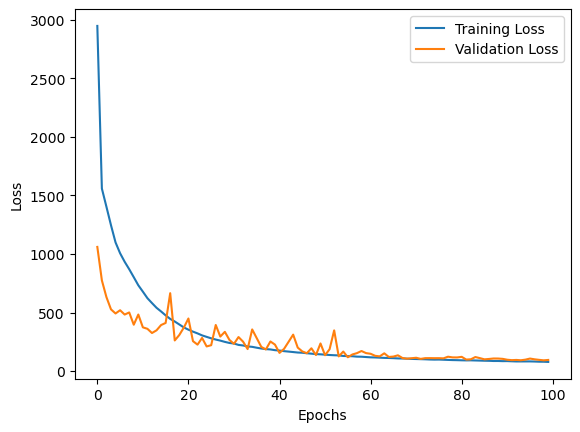

In [ ]:
X_ex = load_images("./image_ex/")
y_ex = load_csv("./joint_ex.csv")

# 손실값 기록
loss = history.history['loss']
val_loss = history.history['val_loss']

# 지표 기록
mae = history.history['mae']
val_mae = history.history['val_mae']

# 시각화 

import matplotlib.pyplot as plt



# 손실값 그래프
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



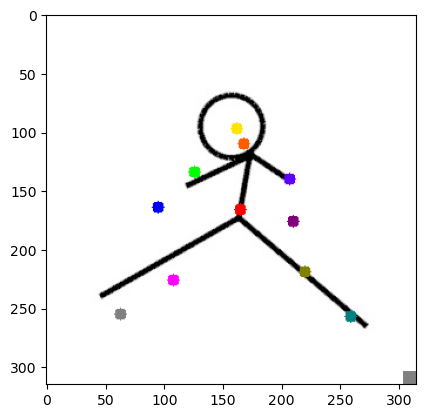

In [ ]:
imageFile = './image_ex/sf_t.png'
X_ex_image = cv2.imread(imageFile)

# 각 관절 위치 값 저장
data=predictions[0]

c1_x = int(round(data[0]))           
c1_y = int(round(data[1]))            
c2_x = int(round(data[2]))             
c2_y = int(round(data[3]))             
c3_x = int(round(data[4]))             
c3_y = int(round(data[5]))             
le_x = int(round(data[6]))             
le_y = int(round(data[7]))            
lh_x = int(round(data[8]))             
lh_y = int(round(data[9]))             
re_x = int(round(data[10]))             
re_y = int(round(data[11]))             
rh_x = int(round(data[12]))             
rh_y = int(round(data[13]))             
lk_x = int(round(data[14]))             
lk_y = int(round(data[15]))              
lf_x = int(round(data[16]))             
lf_y = int(round(data[17]))             
rk_x = int(round(data[18]))             
rk_y = int(round(data[19]))             
rf_x = int(round(data[20]))             
rf_y = int(round(data[21]))  



cv2.circle(X_ex_image,(c1_x,c1_y), radius=5, color=(0,0,255), thickness=-1)  #빨
cv2.circle(X_ex_image,(c2_x,c2_y), radius=5, color=(0,94,255), thickness=-1)  #주
cv2.circle(X_ex_image,(c3_x,c3_y), radius=5, color=(0,228,255), thickness=-1) #노
cv2.circle(X_ex_image,(le_x,le_y), radius=5, color=(0,255,0), thickness=-1)  #초
cv2.circle(X_ex_image,(lh_x,lh_y), radius=5, color=(255,0,0), thickness=-1)  #파
cv2.circle(X_ex_image,(re_x,re_y), radius=5, color=(255,0,95), thickness=-1)
cv2.circle(X_ex_image,(rh_x,rh_y), radius=5, color=(128,0,128), thickness=-1)
cv2.circle(X_ex_image,(lk_x,lk_y), radius=5, color=(255,0,255), thickness=-1)
cv2.circle(X_ex_image,(lf_x,lf_y), radius=5, color=(128,128,128), thickness=-1)
cv2.circle(X_ex_image,(rk_x,rk_y), radius=5, color=(0,128,128), thickness=-1)
cv2.circle(X_ex_image,(rf_x,rf_y), radius=5, color=(128,128,0), thickness=-1)


img = cv2.cvtColor(X_ex_image, cv2.COLOR_BGR2RGB)

#이미지, 점 출력
plt.imshow(img)
plt.show()


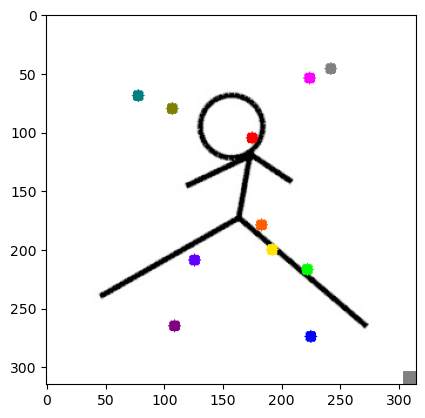

In [ ]:
imageFile = './image_ex/sf_t.png'
X_ex_image = cv2.imread(imageFile)

# 각 관절 위치 값 저장
data=y_ex[0]

c1_x = int(round(data[0]))           
c1_y = int(round(data[1]))            
c2_x = int(round(data[2]))             
c2_y = int(round(data[3]))             
c3_x = int(round(data[4]))             
c3_y = int(round(data[5]))             
le_x = int(round(data[6]))             
le_y = int(round(data[7]))            
lh_x = int(round(data[8]))             
lh_y = int(round(data[9]))             
re_x = int(round(data[10]))             
re_y = int(round(data[11]))             
rh_x = int(round(data[12]))             
rh_y = int(round(data[13]))             
lk_x = int(round(data[14]))             
lk_y = int(round(data[15]))              
lf_x = int(round(data[16]))             
lf_y = int(round(data[17]))             
rk_x = int(round(data[18]))             
rk_y = int(round(data[19]))             
rf_x = int(round(data[20]))             
rf_y = int(round(data[21]))  



cv2.circle(X_ex_image,(c1_x,c1_y), radius=5, color=(0,0,255), thickness=-1)  #빨
cv2.circle(X_ex_image,(c2_x,c2_y), radius=5, color=(0,94,255), thickness=-1)  #주
cv2.circle(X_ex_image,(c3_x,c3_y), radius=5, color=(0,228,255), thickness=-1) #노
cv2.circle(X_ex_image,(le_x,le_y), radius=5, color=(0,255,0), thickness=-1)  #초
cv2.circle(X_ex_image,(lh_x,lh_y), radius=5, color=(255,0,0), thickness=-1)  #파
cv2.circle(X_ex_image,(re_x,re_y), radius=5, color=(255,0,95), thickness=-1)
cv2.circle(X_ex_image,(rh_x,rh_y), radius=5, color=(128,0,128), thickness=-1)
cv2.circle(X_ex_image,(lk_x,lk_y), radius=5, color=(255,0,255), thickness=-1)
cv2.circle(X_ex_image,(lf_x,lf_y), radius=5, color=(128,128,128), thickness=-1)
cv2.circle(X_ex_image,(rk_x,rk_y), radius=5, color=(0,128,128), thickness=-1)
cv2.circle(X_ex_image,(rf_x,rf_y), radius=5, color=(128,128,0), thickness=-1)


img = cv2.cvtColor(X_ex_image, cv2.COLOR_BGR2RGB)

#이미지, 점 출력
plt.imshow(img)
plt.show()
